In [1]:
import matplotlib.pyplot as plt


def read_loss_log(file_name, delimiter='\t'):
    """
    read and load the loss values from a loss.log file
    :param file_name: path of the loss.log file
    :param delimiter: delimiter used to delimit the two columns
    :return: loss_val => numpy array [Iterations x 2]
    """
    from numpy import genfromtxt
    losses = genfromtxt(file_name, delimiter=delimiter)
    return losses


def plot_loss(*loss_vals, plot_name="Loss plot",
              fig_size=(17, 7), save_path=None,
              legends=("discriminator", "generator")):
    """
    plot the discriminator loss values and save the plot if required
    :param loss_vals: (Variable Arg) numpy array or Sequence like for plotting values
    :param plot_name: Name of the plot
    :param fig_size: size of the generated figure (column_width, row_width)
    :param save_path: path to save the figure
    :param legends: list containing labels for loss plots' legends
                    len(legends) == len(loss_vals)
    :return:
    """
    assert len(loss_vals) == len(legends), "Not enough labels for legends"

    plt.figure(figsize=fig_size).suptitle(plot_name)
    plt.grid(True, which="both")
    plt.ylabel("loss value")
    plt.xlabel("spaced iterations")

    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # plot all the provided loss values in a single plot
    plts = []
    for loss_val in loss_vals:
        plts.append(plt.plot(loss_val)[0])

    plt.legend(plts, legends, loc="upper right", fontsize=16)

    if save_path is not None:
        plt.savefig(save_path)

Loss plots have been successfully generated ...
Please check:  loss_plot.png


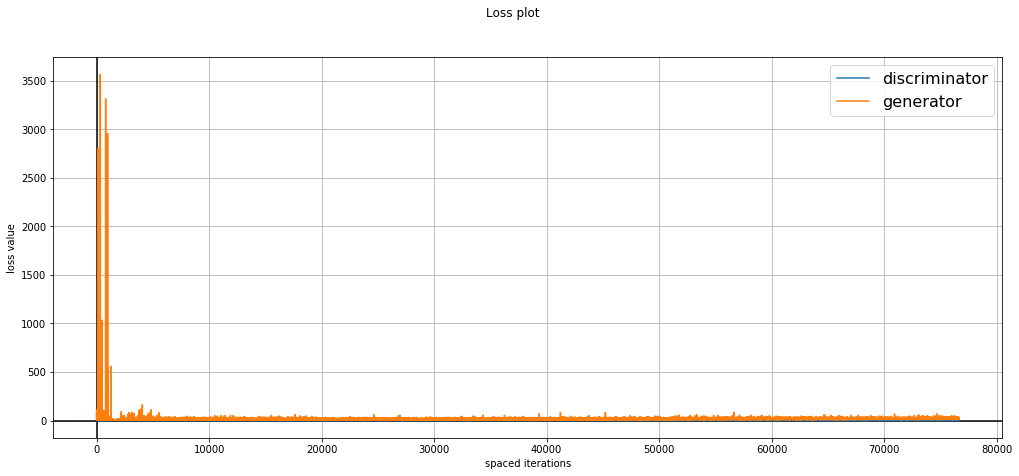

In [3]:
loss_file = 'MSG_GAN_models_d7/loss.log'
plot_file = 'loss_plot.png'

assert loss_file is not None, "Loss-Log file not specified"

# read the loss file
loss_vals = read_loss_log(loss_file)

# plot the loss:
plot_loss(loss_vals[:, 1], loss_vals[:, 2], save_path= plot_file)

print("Loss plots have been successfully generated ...")
print("Please check: ", plot_file)